In [58]:
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as md
from matplotlib.dates import MO, TU, WE, TH, FR, SA, SU

In [ ]:
#adding moving average, price and volume

In [2]:
data = pd.read_csv('raw_tweets_without_dupes_120323.csv', lineterminator='\n')

In [3]:
data.columns

Index(['Unnamed: 0', 'datetime', 'username', 'text', 'date', 'negative_bert',
       'neutral_bert', 'positive_bert', 'to_remove'],
      dtype='object')

In [4]:
data = data[['datetime', 'username', 'text', 'date', 'negative_bert','neutral_bert', 'positive_bert']]

In [5]:
data.to_csv('cleaned_tweets_without_dupes_120323.csv', lineterminator='\n')

In [6]:
data.head()

,datetime,username,text,date,negative_bert,neutral_bert,positive_bert
0,2021-01-01 22:09:59+00:00,sivilianlife,What's the chances @Grayscale is hedging short...,2021-01-01,0.002040,0.951312,0.046648
1,2021-01-01 22:09:39+00:00,LudicrousSpeed9,@CNBC Buy #Bitcoin to hedge against the result...,2021-01-01,0.004157,0.400750,0.595093
2,2021-01-01 22:09:35+00:00,SergioBowers1,@APompliano @pepsi @MonsterEnergy $DEO $KO e...,2021-01-01,0.000248,0.582107,0.417644
3,2021-01-01 22:09:21+00:00,bitvestor,Closed another chunk of this long now. Remaind...,2021-01-01,0.000974,0.807066,0.191960
4,2021-01-01 22:09:18+00:00,FROMKAIWITHLOVE,When you dig deeper into #kardiachain company ...,2021-01-01,0.000056,0.223449,0.776495


In [7]:
data2 = data.groupby(by='date').mean()

/tmp/ipykernel_8329/70205192.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data2 = data.groupby(by='date').mean()


In [8]:
data2['MA7_Sentiment'] = data2['positive_bert'].rolling(window=7).mean()
data2['MA20_Sentiment'] = data2['positive_bert'].rolling(window=21).mean()
data2['MA50_Sentiment'] = data2['positive_bert'].rolling(window=51).mean()

In [9]:
BTC_price = pd.read_csv('../raw_data/2021-01-01_2023-03-10_BTC-USD_1d.csv')

In [10]:
data2

,negative_bert,neutral_bert,positive_bert,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment
date,,,,,,
2021-01-01,0.083330,0.493347,0.423323,NaN,NaN,NaN
2021-01-02,0.134531,0.438811,0.426658,NaN,NaN,NaN
2021-01-03,0.147802,0.428930,0.423267,NaN,NaN,NaN
2021-01-04,0.104159,0.507274,0.388567,NaN,NaN,NaN
2021-01-05,0.081743,0.521464,0.396793,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-03-05,0.107813,0.541465,0.350722,0.355912,0.358391,0.363660
2023-03-06,0.109010,0.507571,0.383419,0.361018,0.359776,0.363419
2023-03-07,0.123972,0.520640,0.355388,0.362125,0.359762,0.363403


In [11]:
BTC_price

,Date,Open,High,Low,Close,Adj Close,Volume,Symbol,price_change
0,2021-01-01,28994.009766,29600.626953,28803.585938,29374.152344,29374.152344,40730301359,BTC-USD,NaN
1,2021-01-02,29376.455078,33155.117188,29091.181641,32127.267578,32127.267578,67865420765,BTC-USD,0.093726
2,2021-01-03,32129.408203,34608.558594,32052.316406,32782.023438,32782.023438,78665235202,BTC-USD,0.020380
3,2021-01-04,32810.949219,33440.218750,28722.755859,31971.914062,31971.914062,81163475344,BTC-USD,-0.024712
4,2021-01-05,31977.041016,34437.589844,30221.187500,33992.429688,33992.429688,67547324782,BTC-USD,0.063197
...,...,...,...,...,...,...,...,...,...
793,2023-03-05,22354.144531,22613.685547,22307.142578,22435.513672,22435.513672,13317001733,BTC-USD,0.003676
794,2023-03-06,22436.816406,22584.292969,22331.314453,22429.757812,22429.757812,17353192895,BTC-USD,-0.000257
795,2023-03-07,22428.322266,22527.417969,22011.261719,22219.769531,22219.769531,22765452204,BTC-USD,-0.009362
796,2023-03-08,22216.441406,22268.896484,21708.050781,21718.080078,21718.080078,22536575684,BTC-USD,-0.022579


In [12]:
BTC_price['Adj Close']

0      29374.152344
1      32127.267578
2      32782.023438
3      31971.914062
4      33992.429688
           ...     
793    22435.513672
794    22429.757812
795    22219.769531
796    21718.080078
797    20363.021484
Name: Adj Close, Length: 798, dtype: float64

In [13]:
data2.reset_index(inplace = True)

In [14]:
data2["BTC_new"] = BTC_price['Adj Close']

In [15]:
data2.head()

,date,negative_bert,neutral_bert,positive_bert,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_new
0,2021-01-01,0.083330,0.493347,0.423323,NaN,NaN,NaN,29374.152344
1,2021-01-02,0.134531,0.438811,0.426658,NaN,NaN,NaN,32127.267578
2,2021-01-03,0.147802,0.428930,0.423267,NaN,NaN,NaN,32782.023438
3,2021-01-04,0.104159,0.507274,0.388567,NaN,NaN,NaN,31971.914062
4,2021-01-05,0.081743,0.521464,0.396793,NaN,NaN,NaN,33992.429688


In [33]:
data2

,date,negative_bert,neutral_bert,positive_bert,MA20_Sentiment,MA50_Sentiment,MA7_Sentiment,BTC_new,bitcoin_volume
0,2021-01-01,0.083330,0.493347,0.423323,NaN,NaN,NaN,29374.152344,40730301359
1,2021-01-02,0.134531,0.438811,0.426658,NaN,NaN,NaN,32127.267578,67865420765
2,2021-01-03,0.147802,0.428930,0.423267,NaN,NaN,NaN,32782.023438,78665235202
3,2021-01-04,0.104159,0.507274,0.388567,NaN,NaN,NaN,31971.914062,81163475344
4,2021-01-05,0.081743,0.521464,0.396793,NaN,NaN,NaN,33992.429688,67547324782
...,...,...,...,...,...,...,...,...,...
793,2023-03-05,0.107813,0.541465,0.350722,0.358391,0.363660,0.355912,22435.513672,13317001733
794,2023-03-06,0.109010,0.507571,0.383419,0.359776,0.363419,0.361018,22429.757812,17353192895
795,2023-03-07,0.123972,0.520640,0.355388,0.359762,0.363403,0.362125,22219.769531,22765452204
796,2023-03-08,0.087879,0.515427,0.396694,0.360095,0.364243,0.367621,21718.080078,22536575684


In [49]:
data2['date']=pd.to_datetime(data2['date'])

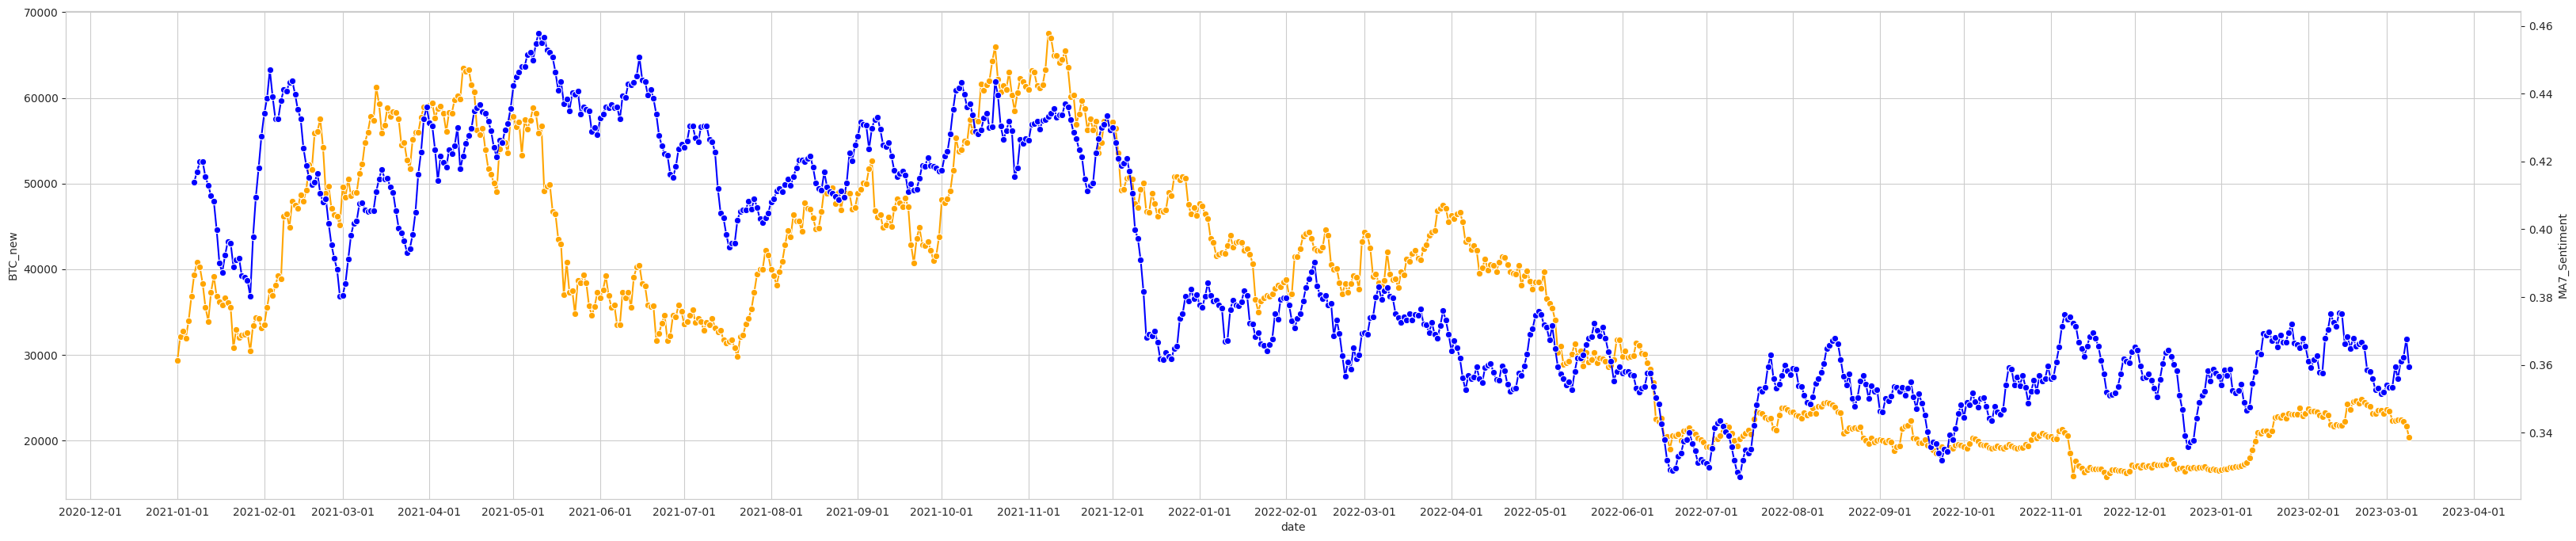

In [97]:
matplotlib.rc_file_defaults()
ax1 = sns.set_style("whitegrid")
ax1 = sns.color_palette('bright')

fig, ax1 = plt.subplots(figsize=(40,8))

sns.lineplot(x = data2['date'], y=data2['BTC_new'], marker='o', sort = False, color='orange')
sns.color_palette('deep')
ax2 = ax1.twinx()
sns.color_palette('deep')
sns.lineplot(x = data2['date'], y=data2['MA7_Sentiment'], marker='o', sort = False, ax=ax2, color='blue').set_xticklabels
ax2.xaxis.set_major_locator(md.MonthLocator())
ax2.xaxis.set_major_formatter(md.DateFormatter('%Y-%m-%d'))

plt.grid()


In [ ]:
#make graph for positive:neutral:negative sentiment over the last 50 days 

In [101]:
data2.shape

(798, 9)

In [107]:
data3 = data2.iloc[-100:]
data3['pos_neg_ratio'] = data3['positive_bert']/data3['negative_bert']
data3['pos_neg_ratio'] = data3['positive_bert']/data3['negative_bert']

/tmp/ipykernel_8329/2061416096.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data3['pos_neg_ratio'] = data3['positive_bert']/data3['negative_bert']


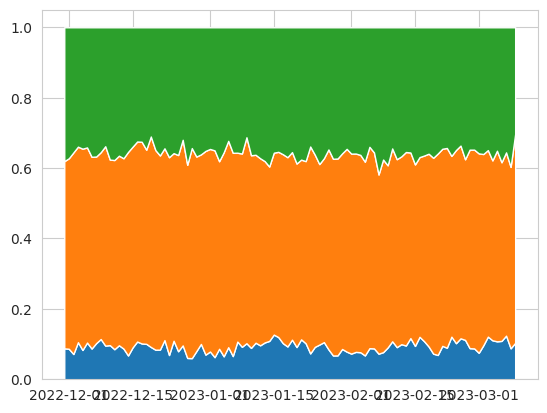

In [106]:
plt.stackplot(data3.date, data3.negative_bert, data3.neutral_bert, data3.positive_bert)

In [98]:
data2.head()

,date,negative_bert,neutral_bert,positive_bert,MA20_Sentiment,MA50_Sentiment,MA7_Sentiment,BTC_new,bitcoin_volume
0,2021-01-01,0.083330,0.493347,0.423323,NaN,NaN,NaN,29374.152344,40730301359
1,2021-01-02,0.134531,0.438811,0.426658,NaN,NaN,NaN,32127.267578,67865420765
2,2021-01-03,0.147802,0.428930,0.423267,NaN,NaN,NaN,32782.023438,78665235202
3,2021-01-04,0.104159,0.507274,0.388567,NaN,NaN,NaN,31971.914062,81163475344
4,2021-01-05,0.081743,0.521464,0.396793,NaN,NaN,NaN,33992.429688,67547324782


<Axes: >

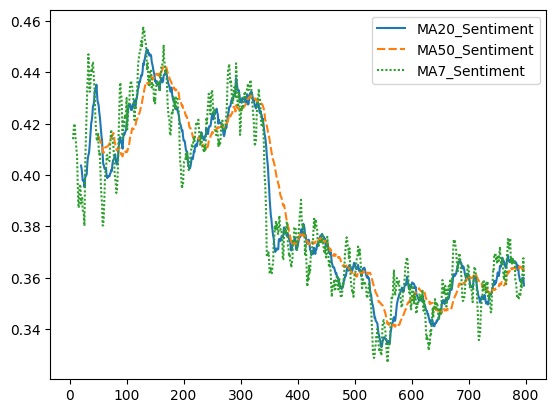

In [18]:
# sns.lineplot(data = data2['BTC_price_adjclose'], marker='o', sort = False)
# sns.lineplot(data = data2['MA7_Sentiment'], marker='o', sort = False)

sns.lineplot(data=data3)

In [19]:
data2['bitcoin_volume'] = BTC_price['Volume']

In [20]:
data2

,date,negative_bert,neutral_bert,positive_bert,MA7_Sentiment,MA20_Sentiment,MA50_Sentiment,BTC_new,bitcoin_volume
0,2021-01-01,0.083330,0.493347,0.423323,NaN,NaN,NaN,29374.152344,40730301359
1,2021-01-02,0.134531,0.438811,0.426658,NaN,NaN,NaN,32127.267578,67865420765
2,2021-01-03,0.147802,0.428930,0.423267,NaN,NaN,NaN,32782.023438,78665235202
3,2021-01-04,0.104159,0.507274,0.388567,NaN,NaN,NaN,31971.914062,81163475344
4,2021-01-05,0.081743,0.521464,0.396793,NaN,NaN,NaN,33992.429688,67547324782
...,...,...,...,...,...,...,...,...,...
793,2023-03-05,0.107813,0.541465,0.350722,0.355912,0.358391,0.363660,22435.513672,13317001733
794,2023-03-06,0.109010,0.507571,0.383419,0.361018,0.359776,0.363419,22429.757812,17353192895
795,2023-03-07,0.123972,0.520640,0.355388,0.362125,0.359762,0.363403,22219.769531,22765452204
796,2023-03-08,0.087879,0.515427,0.396694,0.367621,0.360095,0.364243,21718.080078,22536575684


In [21]:
data2 = data2[['date', 'negative_bert', 'neutral_bert', 'positive_bert',
       'MA20_Sentiment', 'MA50_Sentiment',       'MA7_Sentiment', 'BTC_new', 'bitcoin_volume']]

In [22]:
# data2 = data2.rename(columns={"negative_bert": "average_neg", "neutral_bert": "average_neu", "positive_bert": "average_pos", 'BTC_new':'BTC_price'}),

In [24]:
data2.to_csv('price_volume_sentiment_perday.csv')